In [16]:
#data set: Consumer & Visitor Insights For Neighborhoods
#There are 13 columns of data in the dataset

#load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  linear_model
import itertools
import math

In [2]:
print("读取数据中...")
data = pd.read_csv('cbg_patterns.csv')
print("读取完毕。")
print("属性有: census_block_group、date_range_start、date_range_end、raw_visit_count、raw_visitor_count、visitor_home_cbgs、visitor_work_cbgs、distance_from_home、related_same_day_brand、related_same_month_brand、top_brands、popularity_by_hour、popularity_by_day")

读取数据中...
读取完毕。
属性有: census_block_group、date_range_start、date_range_end、raw_visit_count、raw_visitor_count、visitor_home_cbgs、visitor_work_cbgs、distance_from_home、related_same_day_brand、related_same_month_brand、top_brands、popularity_by_hour、popularity_by_day


In [3]:
#提取数据集中数值属性
v_title=["raw_visit_count","raw_visitor_count","distance_from_home"]
val_data=data[v_title]
print("数值属性有:raw_visit_count、raw_visitor_count、distance_from_home;")

数值属性有:raw_visit_count、raw_visitor_count、distance_from_home;


In [4]:
#提取数据集中标称属性
c_title=["related_same_day_brand"]
print("标称属性有:census_block_group、date_range_start、date_range_end、visitor_home_cbgs、visitor_work_cbgs、related_same_day_brand、related_same_month_brand、top_brands、popularity_by_hour、popularity_by_day;")

标称属性有:census_block_group、date_range_start、date_range_end、visitor_home_cbgs、visitor_work_cbgs、related_same_day_brand、related_same_month_brand、top_brands、popularity_by_hour、popularity_by_day;


标称属性related_same_day_brand频度图(隐去横坐标，并且由于各种类商品数据并不是直接给出,所以先转换格式后再统计个数):


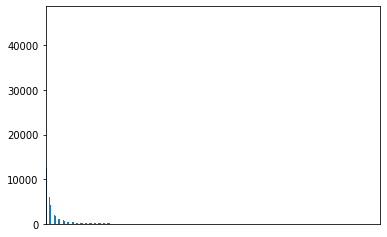

In [5]:
#列出标称属性related_same_day_brand的频度图
print("标称属性related_same_day_brand频度图(隐去横坐标，并且由于各种类商品数据并不是直接给出,所以先转换格式后再统计个数):")						
a=data["related_same_day_brand"]
t=[]
for i in range(len(a)):
    b=a.iloc[[i]].values[0]
    c=b[1:len(b)-1]
    if(not(len(c)==0)):
        d=c.split(',')
        for j in range(len(d)):
            e=d[j][1:len(d[j])-1]
            t.append(e)
series= pd.Series(t)
series.value_counts().plot.bar()
plt.xticks([])
plt.show()

In [6]:
#列出每个数值属性的五数
print("各个数值属性五数概括:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    print(i+":")
    print("\tMin:\t"+str(np.nanmin(t_data)))
    print("\tQ1:\t"+str(np.nanpercentile(t_data,25)))
    print("\tMedian:\t"+str(np.nanmedian(t_data)))
    print("\tQ3:\t"+str(np.nanpercentile(t_data,75)))
    print("\tMax:\t"+str(np.nanmax(t_data)))
    print("")

各个数值属性五数概括:
raw_visit_count:
	Min:	60.0
	Q1:	17042.0
	Median:	30640.0
	Q3:	56678.0
	Max:	7179900.0

raw_visitor_count:
	Min:	50.0
	Q1:	3430.0
	Median:	6541.0
	Q3:	13099.0
	Max:	6113949.0

distance_from_home:
	Min:	706.0
	Q1:	8584.0
	Median:	14614.0
	Q3:	31397.75
	Max:	6297845.0



各个数值属性直方图:


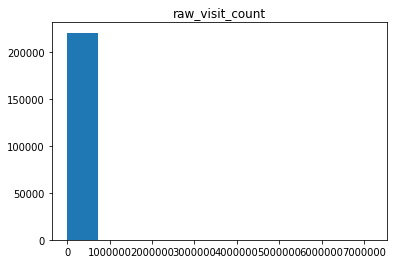

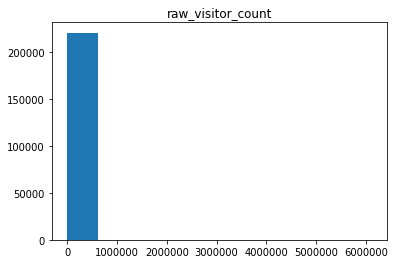

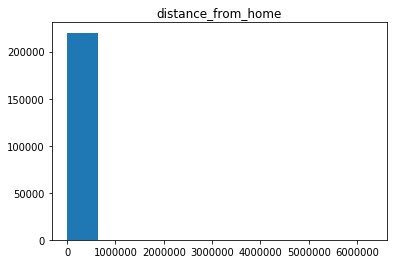

In [7]:
#分别画出每个数据直方图
print("各个数值属性直方图:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    val_data.hist(grid=False,column=i)
    plt.show()

各个数值属性盒图:


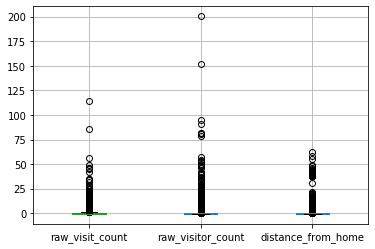

In [8]:
#分别画出每个数据盒图
print("各个数值属性盒图:")
temp_data=val_data
temp_data = (temp_data - np.mean(temp_data,axis=0)) / np.std(temp_data,axis=0)
boxplot=temp_data.boxplot()
plt.show()

In [9]:
#属性离群点
print("离群点:由属性的盒图可以初步看出每个属性都存在大量超过上盒子上限的离群点。")

离群点:由属性的盒图可以初步看出每个属性都存在大量超过上盒子上限的离群点。


In [10]:
#列出每个属性缺失值数量
print("各属性缺失值概括:")
nan_number=data.isnull().sum()
print(nan_number)
#分析数值属性缺失原因
print("数值属性缺失值原因分析:该数据集缺失项除了标称属性census_block_group 中的1项，其余均为数值属性，进一步观察发现大部分的缺失项都同时缺少这三种数值属性，所以考虑是由于录入数据时导致的数据缺失。")

各属性缺失值概括:
census_block_group            1
date_range_start              0
date_range_end                0
raw_visit_count             106
raw_visitor_count           106
visitor_home_cbgs             0
visitor_work_cbgs             0
distance_from_home          217
related_same_day_brand        0
related_same_month_brand      0
top_brands                    0
popularity_by_hour            0
popularity_by_day             0
dtype: int64
数值属性缺失值原因分析:该数据集缺失项除了标称属性census_block_group 中的1项，其余均为数值属性，进一步观察发现大部分的缺失项都同时缺少这三种数值属性，所以考虑是由于录入数据时导致的数据缺失。


缺失值填充
1.将缺失部分剔除
各数值属性剔除缺失值前后各属性盒图对比:


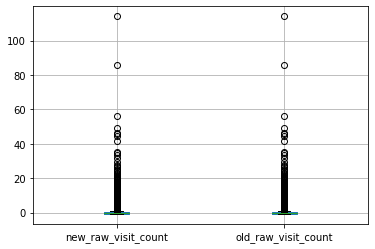

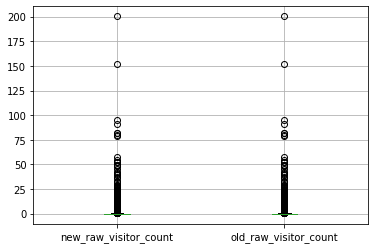

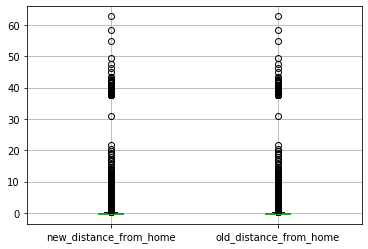

In [11]:
#缺失值填充
print("缺失值填充")
#1.将缺失部分剔除
print("1.将缺失部分剔除")
print("各数值属性剔除缺失值前后各属性盒图对比:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    d_val_data=t_data.dropna()
    contrast=pd.DataFrame(list(itertools.zip_longest(d_val_data,t_data)),columns=['new_'+i, 'old_'+i])
    contrast = (contrast - np.mean(contrast,axis=0)) / np.std(contrast,axis=0)
    boxplot=contrast.boxplot()
    plt.show()

2.用最高频率值来填补缺失值
各数值属性填充前后各属性盒图对比:
raw_visit_count数据集中最高频率值为24531.0。


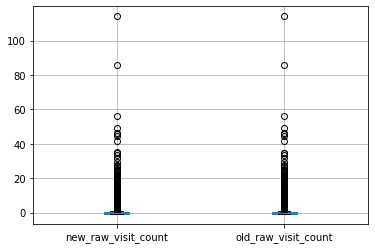

raw_visitor_count数据集中最高频率值为2292.0。


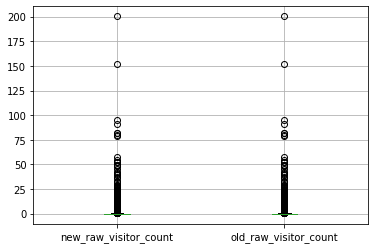

distance_from_home数据集中最高频率值为8345.0。


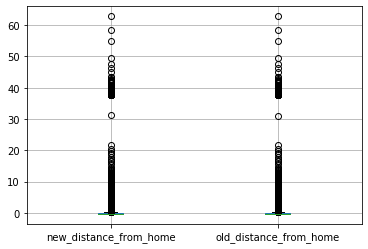

In [12]:
#2.用最高频率值来填补缺失值
print("2.用最高频率值来填补缺失值")
print("各数值属性填充前后各属性盒图对比:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    print(i+"数据集中最高频率值为"+str(t_data.mode()[0])+"。")
    d_val_data=t_data.fillna(value=t_data.mode()[0])
    contrast=pd.DataFrame(list(itertools.zip_longest(d_val_data,t_data)),columns=['new_'+i, 'old_'+i])
    contrast = (contrast - np.mean(contrast,axis=0)) / np.std(contrast,axis=0)
    boxplot=contrast.boxplot()
    plt.show()

3.通过属性的相关关系来填补缺失值
首先剔除掉全空数据，然后计算各数值属性间的Pearson相关系数矩阵，找到与缺失属性最相似的属性进行线性拟合，最后推测出缺失数据进行填充。
各数值属性间相关系数矩阵:
                    raw_visit_count  raw_visitor_count  distance_from_home
raw_visit_count            1.000000           0.815850            0.021721
raw_visitor_count          0.815850           1.000000            0.032879
distance_from_home         0.021721           0.032879            1.000000
各数值属性填充数据111个。
填充前后各属性盒图对比:


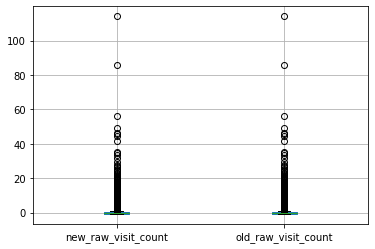

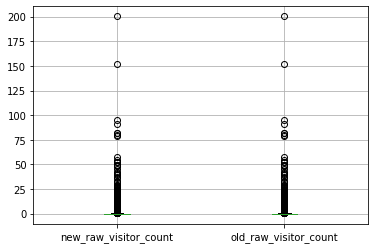

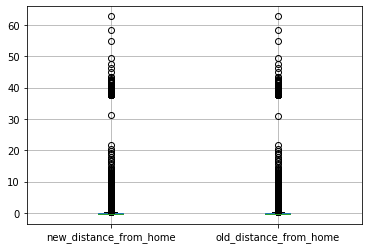

In [13]:
#3.通过属性的相关关系来填补缺失值
print("3.通过属性的相关关系来填补缺失值")
print("首先剔除掉全空数据，然后计算各数值属性间的Pearson相关系数矩阵，找到与缺失属性最相似的属性进行线性拟合，最后推测出缺失数据进行填充。")
nan_data=val_data[val_data.isnull().values==True]
nan_data=nan_data.dropna(axis=0,how='all')
cor=val_data.corr()
print("各数值属性间相关系数矩阵:")
print(cor)
cor=cor.values
nan_title=nan_data.columns.values.tolist()
number=0
for i in nan_title:
    t_data=nan_data[i]
    if(t_data.isnull().sum()>0):
        maxx=-1
        maxn=-1
        for j in range(len(cor[0])):
            if(j!=number):
                if(abs(cor[j][number])>maxx):
                    maxx=abs(cor[j][number])
                    maxn=j
        clf = linear_model.LinearRegression()
        clf.fit(pd.DataFrame(val_data.dropna()[i].values), val_data.dropna()[v_title[maxn]].values)
        for j in range(len(nan_data[i])):
            if(np.isnan(nan_data[i][j:j+1].values[0])):
                if(not(np.isnan(nan_data[v_title[maxn]][j:j+1].values[0]))):
                    nan_data[i][j:j+1].values[0]=clf.predict(np.array(nan_data[v_title[maxn]][j:j+1].values[0]).reshape(-1, 1))
                else:
                    nan_data[i][j:j+1].values[0]=val_data[i].mode()[0]  
    number=number+1
print("各数值属性填充数据"+str(len(nan_data[i]))+"个。")
print("填充前后各属性盒图对比:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    d_val_data=t_data.dropna()
    d_val_data=pd.concat([d_val_data, nan_data[i]])
    contrast=pd.DataFrame(list(itertools.zip_longest(d_val_data,t_data)),columns=['new_'+i, 'old_'+i])
    contrast = (contrast - np.mean(contrast,axis=0)) / np.std(contrast,axis=0)
    boxplot=contrast.boxplot()
    plt.show()

4.通过数据对象之间的相似性来填补缺失值
首先剔除掉全空数据，然后找出与缺失数据其余属性间距离最近的项，按照该项属性值进行缺失值填充。
开始填充
属性raw_visit_count填充完毕
属性raw_visitor_count填充完毕
属性distance_from_home填充完毕
共填充111个数据
填充前后各属性盒图对比:


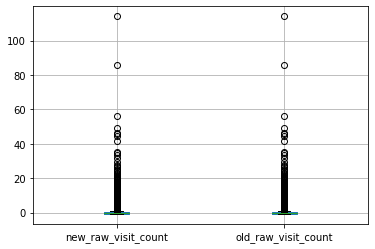

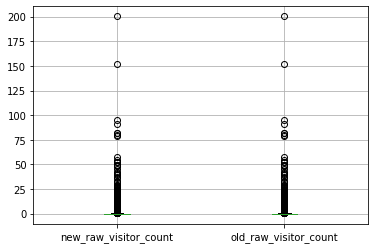

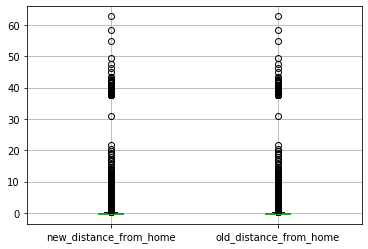

In [14]:
#4.通过数据对象之间的相似性来填补缺失值
print("4.通过数据对象之间的相似性来填补缺失值")    
print("首先剔除掉全空数据，然后找出与缺失数据其余属性间距离最近的项，按照该项属性值进行缺失值填充。")    
nan_data=val_data[val_data.isnull().values==True]
nan_data=nan_data.dropna(axis=0,how='all')
nan_data.drop_duplicates(keep='first',inplace=True)
nan_title=nan_data.columns.values.tolist()

print("开始填充")
for i in nan_title:
    dic={}
    for j in range(len(nan_data[i])):
        if(np.isnan(nan_data[i][j:j+1].values[0])):
            a1=-1 if np.isnan(nan_data[v_title[0]][j:j+1].values[0]) else nan_data[v_title[0]][j:j+1].values[0]
            a2=-1 if np.isnan(nan_data[v_title[1]][j:j+1].values[0]) else nan_data[v_title[1]][j:j+1].values[0]
            a3=-1 if np.isnan(nan_data[v_title[2]][j:j+1].values[0]) else nan_data[v_title[2]][j:j+1].values[0]
            if (a1,a2,a3) in dic:
                nan_data[i][j:j+1]=dic[(a1,a2,a3)]
            else:
                temp=nan_data[nan_data[i].isnull().values==False]
                mins=99999999
                re=-1
                for k in range(len(temp)):
                    a=nan_data.iloc[[j]]
                    b=temp.iloc[[k]]
                    s=0
                    for l in v_title:
                        if(not(np.isnan(a[l].values[0]) or np.isnan(b[l].values[0]))):
                            s=s+math.pow(a[l].values[0]-b[l].values[0],2)
                    tt=s
                    if(tt<mins):
                        mins=tt
                        re=temp.iloc[[1]][i].values[0]
                if(not(re==-1)):
                    nan_data[i][j:j+1]=re
                    dic[(a1,a2,a3)]=re
    print("属性"+i+"填充完毕")
print("共填充"+str(len(nan_data))+"个数据")
print("填充前后各属性盒图对比:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    d_val_data=t_data.dropna()
    d_val_data=pd.concat([d_val_data, nan_data[i]])
    contrast=pd.DataFrame(list(itertools.zip_longest(d_val_data,t_data)),columns=['new_'+i, 'old_'+i])
    contrast = (contrast - np.mean(contrast,axis=0)) / np.std(contrast,axis=0)
    boxplot=contrast.boxplot()
    plt.show()

In [15]:
print("由于缺失数据项相比于全部数据项较少，所以处理前后数据盒图变化不明显。")

由于缺失数据项相比于全部数据项较少，所以处理前后数据盒图变化不明显。
